In [ ]:
# Install EasyOCR
!pip install easyocr

# Install PyTorch
!pip install torch torchvision torchaudio

In [ ]:
import easyocr
from google.colab.patches import cv2_imshow
import cv2

# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'])

In [ ]:
# Path to the image
image_path = '/content/PICTs0028 copy.JPG'

In [ ]:
# Define the preprocessing function
def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve OCR accuracy
    blurred = cv2.GaussianBlur(gray, (5,5), 0)

    # Apply thresholding to get a binary image
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Apply denoising after thresholding
    denoised = cv2.fastNlMeansDenoising(binary, None, 30, 7, 21)

    # Return the preprocessed image
    return denoised

In [ ]:
# Preprocess the image
preprocessed_image = preprocess_image(image_path)

# Save the preprocessed image temporarily
temp_path = 'preprocessed_image.png'
cv2.imwrite(temp_path, preprocessed_image)

True

In [ ]:
# Perform OCR using EasyOCR
result = reader.readtext(temp_path)

In [ ]:
# Initialize variables to calculate average confidence level
total_confidence = 0
num_texts = 0
detected_texts = []

In [ ]:
# Draw bounding boxes on the original image
original_image = cv2.imread(image_path)
for (bbox, text, prob) in result:
    # Collect detected text and confidence level
    detected_texts.append((text, prob))

    # Draw bounding box
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))
    cv2.rectangle(original_image, top_left, bottom_right, (0, 255, 0), 2)

    # Put text with confidence level on the image
    cv2.putText(original_image, f'{text} ({prob:.2f})', top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    # Update total confidence and number of texts
    total_confidence += prob
    num_texts += 1

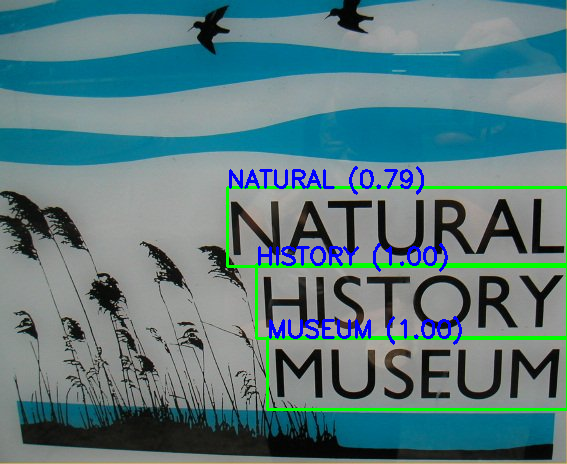

In [ ]:
# Display the image with bounding boxes
cv2_imshow(original_image)

In [ ]:
# Print detected texts and their confidence levels
for text in detected_texts:
    print(f'Detected Text: {text}')

# Calculate and print the average confidence level
if num_texts > 0:
    average_confidence = total_confidence / num_texts * 100
    print(f'Average Confidence Level: {average_confidence}')

Detected Text: ('NATURAL', 0.7945173926577007)
Detected Text: ('HISTORY', 0.9994545835389345)
Detected Text: ('MUSEUM', 0.99868083165537)
Average Confidence Level: 93.08842692840017
